# </h1><center> <font face = "Times New Roman" color = 'brown' size = '6'> <b> DIGIT RECOGNITION </b> </font> </center> </h1>

<font face = "Times New Roman" align = "right"> <b> Team Of:<ul><li>Abhishek Chaudary (191020403)</li><li>Khushi Agrawal (191020429)</li><li>Prabhat Kumar (191020438)</li></ul> </b> </font>


## <font face = "Times New Roman"> <b> Objective </b> </font>

* Perform *Statistical Data Analysis*
* Create *Visualization*
* Perform Dimentionality Reduction - *SVD*, *PCA* and *LDA*
* Perform Classification on data using *Decison Trees*

## <font face = "Times New Roman"> <b> Importing Libraries </b> </font>

In [ ]:
"""
    Data Processing Library
"""

import numpy as np
import pandas as pd
import random
import math
import functools
import scipy as sci

In [ ]:
"""
   To find time executed.
"""

import time

In [ ]:
"""
   Visualization Library
"""

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
"""
   Statistical Library imports
"""

from scipy import stats
from statistics import StatisticsError

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 61kB 5.9MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-cp37-none-any.whl size=66642 sha256=86f5170700373fa40399e576ad4499ae62c2b46db1525d30c8b71ed7d296b161
  Stored in directory: /root/.cache/pip/wheels/60/36/b1/188ee35c677e48463f6482d580f81c19f5f82ae5adbe293fd8
Successfully built dtreeviz


In [ ]:
!pip install graphviz 

In [ ]:
"""
   Visualization Library
"""

try:
  import graphviz
  from dtreeviz.trees import dtreeviz

except ImportError as error:
  print("Import Error")
  print(error)

In [ ]:
"""
   For Dimentionality Reduction.
"""

from sklearn.decomposition import TruncatedSVD 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

In [ ]:
"""
   For Classification
"""

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
try:

  """
     Connect google drive to google colab.
  """
  from google.colab import drive

except ImportError as error:
  print("Import Error")
  print(error)

## <font face = "Times New Roman"> <b> About Data </b> </font>

### <font face = "Times New Roman"> <b> DataSet Description </b> </font>


* The data files `train.csv` and `test.csv` which contain gray-scale images of hand-written digits, from 0-9.

* Total pixel of each image is 784 (28- height & 28- width). It indicates lightness (small value) and darkness (large value).

* Range of pixel values 0-255.

* For training dataset - 785 columns (1st- label, Rest- pixels value).

* For test dataset- 784 columns (All pixel values)

__Why do we need to describe the data?__

We describe the data to know how big the data  is, how it is distributed, how much values and features our data have, what is the shape of the data, weather there is a missing value in the data or not and to know some basic things like what is the mean, meadian, mode, standard deviation, etc of the data. 

In [ ]:
"""
   Connect google drive to google colab.
"""

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
   Function to load dataset.
"""

def load_data(file_path):
  try:
    df = pd.read_csv(file_path)
    return df
  
  except FileNotFoundError as error:
    print("File Not Found Error during loading data")
    raise error

  except Exception as error:
      print("Exception Error: load_data")
      print(error)
      return ""

In [ ]:
"""
   Loading training and testing data.
"""

train_file = "/content/drive/MyDrive/train.csv"
test_file = "/content/drive/MyDrive/test.csv"

df_train = load_data(train_file)
df_test = load_data(test_file)

In [ ]:
"""
   Printing Shapes
"""

print("Training Set Shape: ", df_train.shape)
print("Testing Set Shape: ", df_test.shape)

Training Set Shape:  (42000, 785)
Testing Set Shape:  (28000, 784)


In [ ]:
"""
   Displaying top 5 rows and columns of training set.
"""

df_train.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [ ]:
"""
   Displaying top 5 rows and columns of testing set.
"""

df_test.head()

pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]

In [ ]:
"""
    For Showing NumPy representation of DataFrame.
"""

df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
df_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [ ]:
"""
  Describing the Training data
"""
df_train.describe()

label   pixel0   pixel1  ...  pixel781  pixel782  pixel783
count  42000.000000  42000.0  42000.0  ...   42000.0   42000.0   42000.0
mean       4.456643      0.0      0.0  ...       0.0       0.0       0.0
std        2.887730      0.0      0.0  ...       0.0       0.0       0.0
min        0.000000      0.0      0.0  ...       0.0       0.0       0.0
25%        2.000000      0.0      0.0  ...       0.0       0.0       0.0
50%        4.000000      0.0      0.0  ...       0.0       0.0       0.0
75%        7.000000      0.0      0.0  ...       0.0       0.0       0.0
max        9.000000      0.0      0.0  ...       0.0       0.0       0.0

[8 rows x 785 columns]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
df_train.describe()

label   pixel0   pixel1  ...  pixel781  pixel782  pixel783
count  42000.000000  42000.0  42000.0  ...   42000.0   42000.0   42000.0
mean       4.456643      0.0      0.0  ...       0.0       0.0       0.0
std        2.887730      0.0      0.0  ...       0.0       0.0       0.0
min        0.000000      0.0      0.0  ...       0.0       0.0       0.0
25%        2.000000      0.0      0.0  ...       0.0       0.0       0.0
50%        4.000000      0.0      0.0  ...       0.0       0.0       0.0
75%        7.000000      0.0      0.0  ...       0.0       0.0       0.0
max        9.000000      0.0      0.0  ...       0.0       0.0       0.0

[8 rows x 785 columns]

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


Finding if the index of the training and testing data is unique or not (i.e. weather the feature is repeated or not)

In [ ]:
df_train.index.is_unique

True

In [ ]:
df_test.index.is_unique

True

Counting the number of rows and columns present in the training and testing dataset

In [ ]:
df_train.count

<bound method DataFrame.count of        label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0    

In [ ]:
df_test.count

<bound method DataFrame.count of        pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
27995       0       0       0       0  ...         0         0         0         0
27996       0       0       0       0  ...         0         0         0         0
27997       0       0       0       0  ...         0         0         0         0
27998       0       0       0       0  ...         0         0         0         0
27999       0       0       0       0  ...         0  

Checking weather any value in dataset is empty or not

In [ ]:
df_train.isnull().head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0  False   False   False   False  ...     False     False     False     False
1  False   False   False   False  ...     False     False     False     False
2  False   False   False   False  ...     False     False     False     False
3  False   False   False   False  ...     False     False     False     False
4  False   False   False   False  ...     False     False     False     False

[5 rows x 785 columns]

In [ ]:
df_test.isnull().head()

pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0   False   False   False   False  ...     False     False     False     False
1   False   False   False   False  ...     False     False     False     False
2   False   False   False   False  ...     False     False     False     False
3   False   False   False   False  ...     False     False     False     False
4   False   False   False   False  ...     False     False     False     False

[5 rows x 784 columns]

Dropping the missing values from the dataset

In [ ]:
df_train.dropna().head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [ ]:
df_test.dropna().head()

pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]

Since dropping is not a good solution, we can fill the missing values using the method `ffill` which will propagate last valid observation forward

In [ ]:
df_train.fillna(method="ffill").head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

## <font face = "Times New Roman"> <b> Data Visualization </b> </font>

### <font face = "Times New Roman"> <b> Plot Digits </b> </font>

In [ ]:
"""
   Converting dataframe into numpy array.
"""

train_all = df_train.iloc[:,1:]
train_all_numpy = train_all.to_numpy()
train_label = df_train["label"]
train_label_numpy = train_label.to_numpy()

In [ ]:
train_all.head()

pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]

Printing the shape of the numpy array to confirm weather any row or column is missing or not

In [ ]:
print(train_all_numpy)
print("Shape: ", train_all_numpy.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape:  (42000, 784)


In [ ]:
train_label.head()

In [ ]:
print(train_label_numpy)
print("Shape: ", train_label_numpy.shape)

[1 0 1 ... 7 6 9]
Shape:  (42000,)


Creating a user defined function to plot random 25 (5$\times$5) digits (or values)

In [ ]:
def plot_digit(data, label):
  try:

    fig, axis = plt.subplots(5, 5, figsize = (16, 16)) 
    k = 0 

    for i in range(5):
      for j in range(5): 

        # To plot image 
        axis[i, j].imshow(data[k].reshape(28, 28), interpolation = "none", cmap = "gray")

        # To print label            
        axis[i, j].set_ylabel("label:" + str(label[k].item()))     

        k +=1

  except Exception as error:
    print("Error while plotting digit")
    print(error)

Plotting the digits

Time taken to plot:  0.49978041648864746


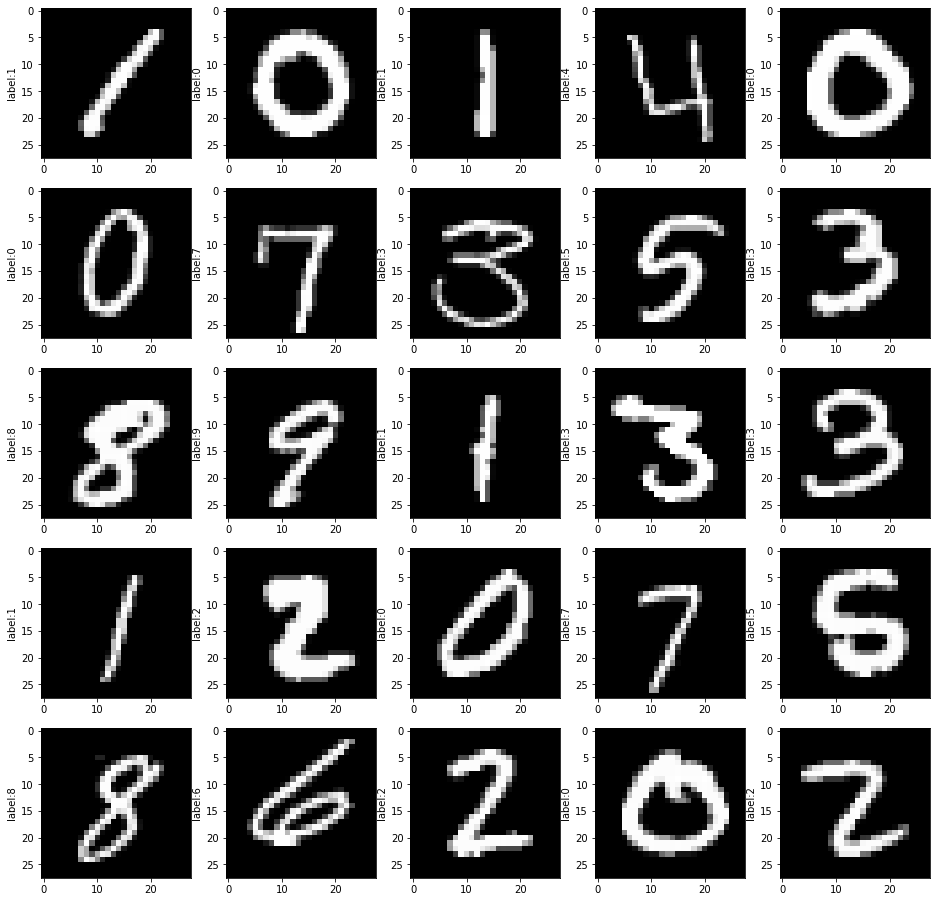

In [ ]:
start = time.time()
plot_digit(train_all_numpy, train_label_numpy)
print("Time taken to plot: ", time.time() - start)

### <font face = "Times New Roman"> <b> Plotting Digits Separately </b> </font>

In [ ]:
def select_digit(train_all, train_label, df_train, _digit):

  try:

    _digit = int(_digit)

    _data = train_all[df_train["label"] == _digit]
    _data_numpy = _data.to_numpy()

    _data_label = train_label[df_train["label"] == _digit]
    _data_label_numpy = _data_label.to_numpy()

    return _data, _data_numpy, _data_label, _data_label_numpy

  except ValueError as error:
    raise error

  except TypeError as error:
    raise error

  except IndentationError as error:
    raise error

In [ ]:
_digit = input("Enter digit who has to be ploted: ")

_data, _data_numpy, _data_label, _data_label_numpy = select_digit(train_all, train_label, df_train, _digit)

Enter digit who has to be ploted: 6


In [ ]:
"""
train_label_1 = train_label[df_train["label"]==1]
train_label_1_numpy = train_label_1.to_numpy()
train_all_1 = train_all[df_train["label"] == 1]
train_all_1_numpy = train_all_1.to_numpy()
"""

In [ ]:
# train_label_1 = train_label[df_train["label"]==1]
# train_label_1.head()

_data_label.head()

8     5
19    5
51    5
62    5
80    5
Name: label, dtype: int64

In [ ]:
#print(train_label_1_numpy)
#print("Shape: ", train_label_1_numpy.shape)

print(_data_label_numpy)
print("Shape: ", _data_label_numpy.shape)

[5 5 5 ... 5 5 5]
Shape:  (3795,)


In [ ]:
#train_all_1 = train_all[df_train["label"] == 1]
#train_all_1.head()

_data.head()

pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
8        0       0       0       0  ...         0         0         0         0
19       0       0       0       0  ...         0         0         0         0
51       0       0       0       0  ...         0         0         0         0
62       0       0       0       0  ...         0         0         0         0
80       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]

In [ ]:
#print(train_all_1_numpy)
#print("Shape: ", train_all_1_numpy.shape)

print(_data)
print(_data_numpy.shape)

       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
8           0       0       0       0  ...         0         0         0         0
19          0       0       0       0  ...         0         0         0         0
51          0       0       0       0  ...         0         0         0         0
62          0       0       0       0  ...         0         0         0         0
80          0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41928       0       0       0       0  ...         0         0         0         0
41941       0       0       0       0  ...         0         0         0         0
41942       0       0       0       0  ...         0         0         0         0
41987       0       0       0       0  ...         0         0         0         0
41989       0       0       0       0  ...         0         0         0         0

[37

Time taken to plot:  0.4657595157623291


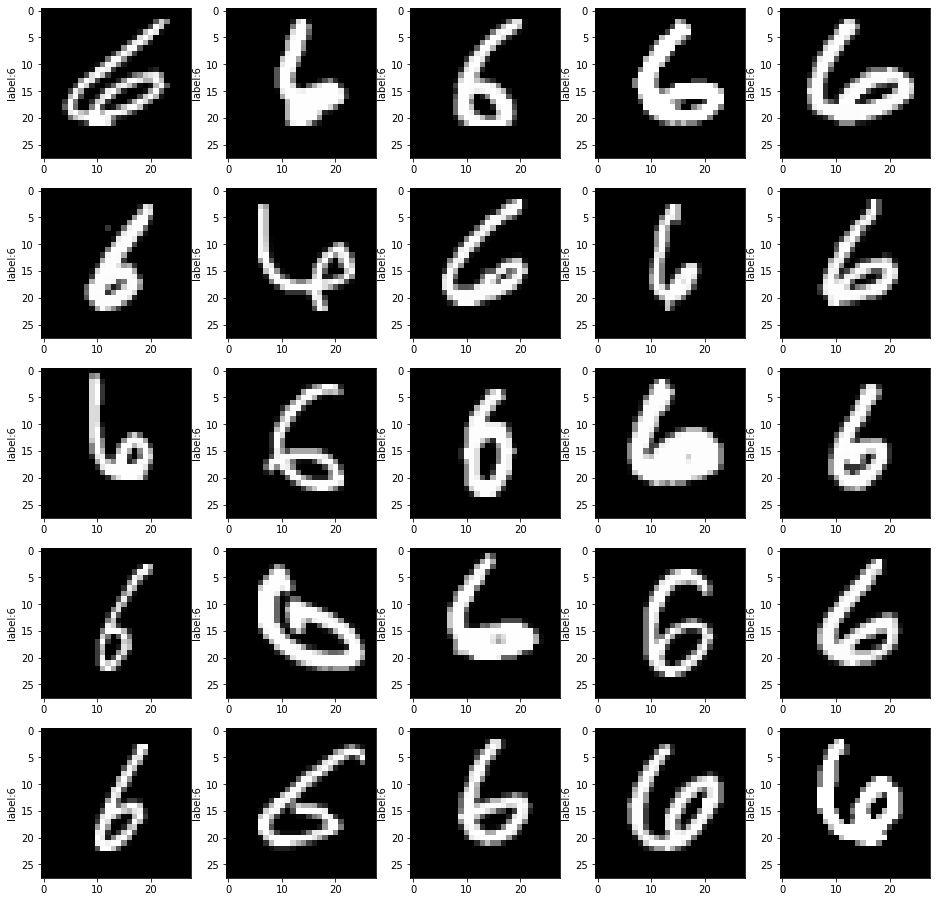

In [ ]:
start = time.time()
#plot_digit(train_all_1_numpy, train_label_1_numpy)
plot_digit(_data_numpy, _data_label_numpy)
print("Time taken to plot: ", time.time() - start)

### <font face = "Times New Roman"> <b> P Color Mesh </b> </font>

We can plot P Color Mesh to show the pseudo color distribution of the data using the matplotlib's function `plt.pcolormesh()`

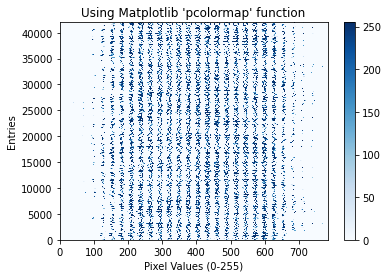

Time taken to plot:  16.65897488594055


In [ ]:
try:
  start = time.time()
  plot = plt.pcolormesh(train_all_numpy, cmap="Blues")
  plt.title("Using Matplotlib 'pcolormap' function")
  plt.colorbar(plot)
  plt.xlabel("Pixel Values (0-255)")
  plt.ylabel("Entries")
  plt.show()
  print("Time taken to plot: ", time.time() - start)

except AttributeError as error:
  print("Attribute Error Occured.")
  print("The error is ", error)
  
except ValueError as error:
  print("Value Error Occured.")
  print("The error is ", error)

Alternatively we can directly plot using the `plt.pcolor()` but this is much slower than `plt.pcolormesh()`

In [ ]:
#plt.pcolor(train_all_numpy)

### <font face = "Times New Roman"> <b> Contour Plot </b> </font>

We can plot the contour plot using the matplootlib's library function `plt.contour()`

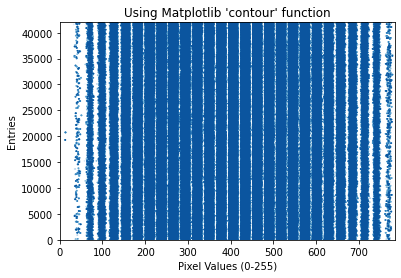

Time taken to plot:  56.82214617729187


In [ ]:
try:
  start = time.time()
  plt.contour(train_all_numpy, cmap="Blues")
  plt.title("Using Matplotlib 'contour' function")
  plt.xlabel("Pixel Values (0-255)")
  plt.ylabel("Entries")
  plt.show()
  print("Time taken to plot: ", time.time() - start)

except AttributeError as error:
  print("Attribute Error Occured.")
  print("The error is ", error)
  
except ValueError as error:
  print("Value Error Occured.")
  print("The error is ", error)

### <font face = "Times New Roman"> <b> Count Plot </b> </font>

We can plot the count plot using the seaborn's library function `sns.countplot()`

The count plot let us directly compare the count of the data in groups

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


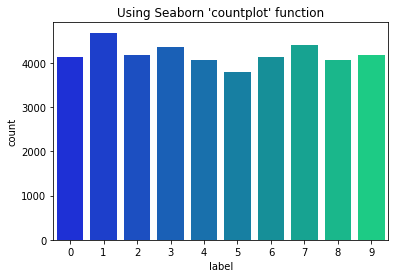

Time taken to plot:  0.1915574073791504


In [ ]:
try:
  start = time.time()
  sns.countplot(train_label, palette = 'winter')
  plt.title("Using Seaborn 'countplot' function")
  plt.show()
  print("Time taken to plot: ", time.time() - start)

except AttributeError as error:
  print("Attribute Error Occured.")
  print("The error is ", error)
  
except ValueError as error:
  print("Value Error Occured.")
  print("The error is ", error)

### <font face = "Times New Roman"> <b> Pie Chart </b> </font>

To plot the Pie chart, we first need to group the data according to there assorted digits.

We use 'dataframe.groupby()' to group the data.

The pie chart will let us know how any data count in a group is relative to another group count.

In [ ]:
counts = df_train.groupby('label')["label"].count()
print(counts)
print(type(counts))

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64
<class 'pandas.core.series.Series'>


We can plot the data using the `plt.pie()`.

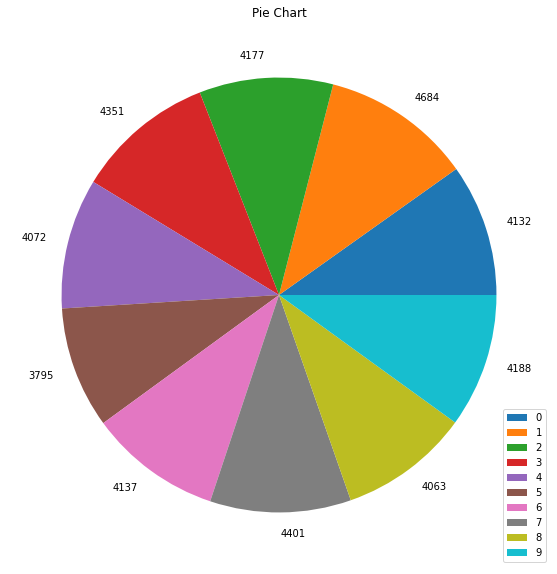

Time taken to plot:  0.1500539779663086


In [ ]:
try:
  start = time.time()
  label = counts
  count = counts.index
  plt.figure(figsize=(10, 10))
  plt.pie(counts, labels=label)
  plt.legend(count, loc='lower right')
  plt.title('Pie Chart')
  plt.show()
  print("Time taken to plot: ", time.time() - start)

except AttributeError as error:
  print("Attribute Error Occured.")
  print("The error is ", error)
  
except ValueError as error:
  print("Value Error Occured.")
  print("The error is ", error)

### <font face = "Times New Roman"> <b> Intensity Plots </b> </font>

We used intensity plot to plot the intensity of the pixel color. It can be plot by creating a user defined function.

In [ ]:
def intensity_plot(_data):
  
  try:

    start = time.time()

    ax = sns.distplot(_data,
                  bins=12,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 10,'alpha':0.6})

    ax.set(xlabel='Pixel Values', ylabel='Frequency')
    print("Time taken to plot: ", time.time() - start)

  except AttributeError as error:
    print("Attribute Error Occured.")
    print("The error is ", error)
    
  except ValueError as error:
    print("Value Error Occured.")
    print("The error is ", error)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


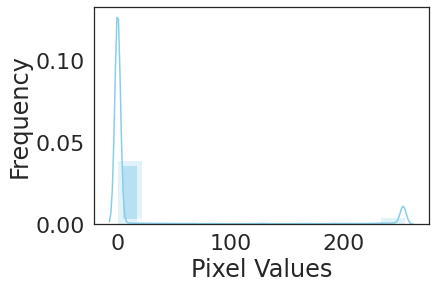

In [ ]:
intensity_plot(train_all)

As we can see above, since the images have black background and some hint of grey areound the white digits, most of the intensity is near 0 and very small peak at 255 which is white

Enter digit whose distribution has to be ploted: 5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


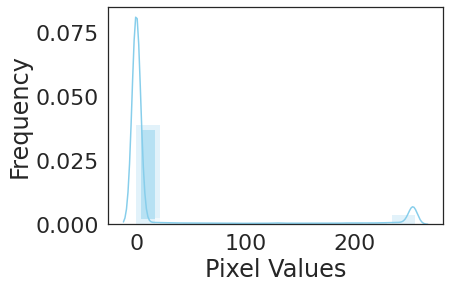

In [ ]:
_digit = input("Enter digit whose distribution has to be ploted: ")

_data, _data_numpy, _data_label, _data_label_numpy = select_digit(train_all, train_label, df_train, _digit)

intensity_plot(_data)

## <font face = "Times New Roman"> <b> Statistical Data Analysis </b> </font>

### <font face = "Times New Roman"> <b> Estimates Of Location </b> </font>

<font face="Times New Roman"> <h4>**Definition** </font></h4>

* To find `typical` or `central` value that best describes the data.
* To estimate `location` parameter for the distribution.

#### <font face = "Times New Roman"> <b> Mean </b> </font>

**Basic Theory** 

* **Definition:** `Mean` is sum of values divided by the total number of values.
* Also known as `Average`.

**Formula:**

To compute the mean for a set of $n$ values $x_1, x_2, ..., x_n$ is:

\begin{equation}
  \textrm{Mean} = \bar{x} = \frac{\sum ^n_{i=1} x_i}{n} \tag{i}
\end{equation}

Here, $\bar{x}$ : Represents mean of a sample from population.


In [ ]:
def find_mean(_data_numpy, n):

  try:

    print("Shape of selected numpy array: ", _data_numpy.shape)

    n = int(n)

    if n is 0:
      start = time.time()
      sum = 0
      for i in range(_data_numpy.shape[0]):
        for j in range(_data_numpy.shape[1]):
          sum += _data_numpy[i][j]
      mean = float(sum/(_data_numpy.shape[0]*_data_numpy.shape[1]))
      print("Time taken to calculate: ", time.time() - start)
      return mean

    elif n is 1:
      start = time.time()
      sum = np.sum(_data_numpy)
      mean = float(sum/(_data_numpy.shape[0]*_data_numpy.shape[1]))
      print("Time taken to calculate: ", time.time() - start)
      return mean

    elif n is 2:
      start = time.time()
      mean = _data_numpy.mean()
      print("Time taken to calculate: ", time.time() - start)
      return mean
    
    if n is not 0 or n is not 1 or n is not 2:
      print("Enter correct value")

  except StatisticsError as error:
    raise error
  
  except FloatingPointError as error:
    raise error

  except NameError as error:
    raise error

  except ZeroDivisionError as error:
    raise error

  except ValueError as error:
    raise error

  except TypeError as error:
    raise error

In [ ]:
n = input("Enter 0 (To find mean without any library function), Enter 1 (To find via using np.sum()), Enter 2 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

_digit = input("Enter the digit whose mean of pixel values you want to find: ")
print("Data Type of digit: ", type(_digit))

_data, _data_numpy, _data_label, _data_label_numpy = select_digit(train_all, train_label, df_train, _digit)

mean = find_mean(_data_numpy, n)
print("Mean of sample: ", mean)

Enter 0 (To find mean without any library function), Enter 1 (To find via using np.sum()), Enter 2 (Via using Library Function): 2
Data Type of taken input:  <class 'str'>
Enter the digit whose mean of pixel values you want to find: 5
Data Type of digit:  <class 'str'>
Shape of selected numpy array:  (3795, 784)
Time taken to calculate:  0.004290580749511719
Mean of sample:  32.95398012960125


#### <font face = "Times New Roman"> <b> Trimmed Mean </b> </font>

**Basic Theory**

* **Definition:** `Trimmed Mean` is the average of all values after dropping fixed number of extreme values (sorted values).
* Also known as `Truncated Mean`.
* Widely used to avoid the influence of outliers.
* It is a trade-off between the median and the mean.

**Formula:**

Here, $x_1 , x_2 , ..., x_n$ represents the sorted values, where $x_1$ is the smallest and $x_n$ is the largest value.

\begin{equation}
  \textrm{Trimmed Mean} = \bar{x} = \frac{\sum ^{n-p}_{i=p+1} x_{(i)}}{n-2p} \tag{ii}
\end{equation}

> <font color = "green"> <b> <i> Note: </i> </b></font> `2p` represent the omitted smallest and largest values.

In [ ]:
def find_trimmed_mean(_data_numpy, n, p):

  try:

    print("Shape of selected numpy array: ", _data_numpy.shape)

    n = int(n)
    p = float(p)
    _data_numpy = np.asarray(_data_numpy)
    sort_time = time.time()
    _data_numpy = np.sort(_data_numpy).ravel()
    print("Time taken to sort the array: ", time.time() - _sort_time)

    if n is 0:
      start = time.time()
      num = _data_numpy.shape[0]
      lower_val = int(p * num)
      upper_val = num - lower_val

      if (lower_val > upper_val):
        raise ValueError("Proportion too big.")

      atmp = np.partition(_data_numpy, (lower_val, upper_val - 1), 0)
      sl = [slice(None)] * atmp.ndim
      sl[0] = slice(lower_val, upper_val)
      trim_mean = np.mean(atmp[tuple(sl)], axis=0)

      print("Time taken to calculate: ", time.time() - start)
      return trim_mean

    elif n is 1:
      start = time.time()
      trim_mean = stats.trim_mean(_data_numpy, p)
      print("Time taken to calculate: ", time.time() - start)
      return trim_mean
    
    if n is not 0 or n is not 1:
      print("Enter correct value")

  except StatisticsError as error:
    raise error
  
  except FloatingPointError as error:
    raise error

  except NameError as error:
    raise error

  except ZeroDivisionError as error:
    raise error

  except ValueError as error:
    print()
    print(error)
    raise error

  except TypeError as error:
    print()
    print(error)
    raise error


In [ ]:
n = input("Enter 0 (To find trimmed mean without any library function), Enter 1 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

_digit = input("Enter the digit whose trimmed mean of pixel values you want to find: ")
print("Data Type of digit: ", type(_digit))

p = input("Enter fraction of values you want to omit: ")
print("Data Type of taken value: ", type(n))

_data, _data_numpy, _data_label, _data_label_numpy = select_digit(train_all, train_label, df_train, _digit)
print(type(_data_numpy))

trim_mean = find_trimmed_mean(_data_numpy, n, p)
print("Trimmed Mean of sample: ", trim_mean)

Enter 0 (To find trimmed mean without any library function), Enter 1 (To find via using np.sum()), Enter 2 (Via using Library Function): 0
Data Type of taken input:  <class 'str'>
Enter the digit whose trimmed mean of pixel values you want to find: 5
Data Type of digit:  <class 'str'>
Enter fraction of values you want to omit: 0.1
Data Type of taken value:  <class 'str'>
<class 'numpy.ndarray'>
Shape of selected numpy array:  (3795, 784)
Time taken to calculate:  0.027843236923217773
Trimmed Mean of sample:  10.621157924632303


#### <font face = "Times New Roman"> <b> Median </b> </font>

**Basic Theory**

* **Definition:** `Median` is the middle number on a sorted list of the data.
* It depends only on values in center of the data.

**Formula:**

$$
Med(X) = \left\{
    \begin{array}\\
        X[\frac{n}{2}] & \mbox{if n is even}\\
        \frac{(X[\frac{n-1}{2}]+X[\frac{n+1}{2}])}{2} & \mbox{if n is odd}
    \end{array}
\right.
$$

Where,

$X = $ Ordered list of values in dataset

$n = $ number of values in dataset

In [ ]:
def find_median(_data_numpy, n):

  try:

    print("Shape of selected numpy array: ", _data_numpy.shape)

    n = int(n)
    _sort_time = time.time()
    _data_numpy = np.sort(_data_numpy).ravel()
    print("Time taken to sort the array: ", time.time() - _sort_time)
    print("Data type of _data_numpy: ", type(_data_numpy))
   
    if n is 0:
      start = time.time()

      num = len(_data_numpy)#.shape[0]*_data_numpy.shape[1]
      
      if num%2 is 1:
        print("Number of terms is odd")
        ob_num = (num+1)/2
        #median = np.where(_data_numpy == )
        median = _data_numpy[ob_num]

      elif num%2 is 0:
        print("Number of terms is even")
        ob_num_1 = int((num-1)/2)
        observation_1 = _data_numpy[ob_num_1]
        ob_num_2 = int((num+1)/2)
        observation_2 = _data_numpy[ob_num_2]
        median = (observation_1 + observation_2)/2

      print("Time taken to calculate: ", time.time() - start)
      return median

    elif n is 1:
      start = time.time()
      median = np.median(_data_numpy)
      print("Time taken to calculate: ", time.time() - start)
      return median
    
    if n is not 0 or n is not 1:
      print("Enter correct value")

  except StatisticsError as error:
    raise error
  
  except FloatingPointError as error:
    raise error

  except NameError as error:
    raise error

  except ZeroDivisionError as error:
    raise error

  except ValueError as error:
    print()
    print(error)
    raise error

  except TypeError as error:
    print()
    print(error)
    raise error

  except AttributeError as error:
    print()
    print(error)
    raise error


In [ ]:
n = input("Enter 0 (To find median without any library function), Enter 1 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

_digit = input("Enter the digit whose median of pixel values you want to find: ")
print("Data Type of digit: ", type(_digit))

_data, _data_numpy, _data_label, _data_label_numpy = select_digit(train_all, train_label, df_train, _digit)
print(type(_data_numpy))

median = find_median(_data_numpy, n)
print("Median of sample: ", median)

Enter 0 (To find median without any library function), Enter 1 (Via using Library Function): 0
Data Type of taken input:  <class 'str'>
Enter the digit whose median of pixel values you want to find: 4
Data Type of digit:  <class 'str'>
<class 'numpy.ndarray'>
Shape of selected numpy array:  (4072, 784)
Time taken to sort the array:  0.07552218437194824
Data type of _data_numpy:  <class 'numpy.ndarray'>
0
Number of terms is even
Time taken to calculate:  4.458427429199219e-05
Median of sample:  127.5


### <font face = "Times New Roman"> <b> Estimates Of Variability </b> </font>

__Why do we need to calculate the estimate the variability?__

We calculate the estimation of variability because it tells us how our data is spread on the graph.

<font face="Times New Roman"> <h4>**Definition** </font></h4>

* `Variability` between samples refers to range of values differs between samples.
* Also refered as `Dispersion`.
* It measures whether data values are `tighly clustered` or `spread`.

#### <font face = "Times New Roman"> <b> Mean Absolute Deviation </b> </font>

**Basic Theory**

* `Deviations` tell us how dispersed the data is around the central value.
* `MAD` is the mean of absolute deviation of data points from mean.

**Formula**

\begin{equation}
    \textrm{Mean absolute deviation} = \frac{\sum^n_{i=1} |x_i-\bar{x}|}{n} \tag{iv}\\
\end{equation}

where, $\bar{x}$ is the sample mean, n is total number of observations and $x_1$, $x_2$, .......$x_n$ are data points

In [ ]:
def find_mad(_data):

  try:

    print("Shape of selected numpy array: ", _data.shape)
    print("Data type of _data_numpy: ", type(_data))
   
    start = time.time()
    #mad_col = _data_numpy.mad()
    mad_row = _data.mad(axis=1, skipna=False)
    print("Time taken to calculate: ", time.time() - start)
    return mad_row
  
  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error


In [ ]:
_digit = input("Enter the digit whose MAD of pixel values you want to find: ")
print("Data Type of digit: ", type(_digit))

_data, _data_numpy, _data_label, _data_label_numpy = select_digit(train_all, train_label, df_train, _digit)

mad_row = find_mad(_data)
print("Mean Absolute Deviation of sample (row): \n", mad_row)

Enter the digit whose median of pixel values you want to find: 6
Data Type of digit:  <class 'str'>
Shape of selected numpy array:  (4137, 784)
Data type of _data_numpy:  <class 'pandas.core.frame.DataFrame'>
Time taken to calculate:  0.09930419921875
Mean Absolute Deviation of sample (row): 
 21       54.180963
26       58.024768
45       54.288343
64       70.624740
72       71.568673
           ...    
41921    62.199484
41927    47.322515
41967    62.453275
41993    68.910665
41998    54.998217
Length: 4137, dtype: float64


#### <font face = "Times New Roman"> <b> Variance and Standard Deviation </b> </font>

**Basic Theory**



**Variance:**

* `Variance` is defined as the average of squared deviations.
* Variance of population is denoted by σ<sup>2</sup>
* Variance of sample is denoted by s<sup>2</sup>
* **Formula:**

\begin{equation}
    \textrm{Variance} = s^2 = \frac{\sum^n_{i=1} (x_i-\bar{x})^2}{n-1} \tag{v}\\
\end{equation}

Here, $x_1$, $x_2$, $x_3$, ......, $x_n$ are values in dataset, $\bar{x}$ : Represents mean of a sample and n is total number of observations of sample.


**Standard Deviation**

* `Standard deviation` is the square root of the variance.
* It measures spread around the mean.
* Standard deviation is on same scale as original data, therefore it is easier to interpret.
* **Formula:**

\begin{equation}
    \textrm{Standard Deviation} = s = \sqrt{Variance}\tag{vi}\\
\end{equation}

> <font color = "green"> <b> <i> Note: </i> </b></font> `Variance` and `Standard Deviation` are sensitive to **outliers** because they are based on the squared deviations.

In [ ]:
def find_var_std(_data_numpy, n):

  try:

    n = int(n)

    print("Shape of selected numpy array: ", _data_numpy.shape)
    print("Data type of _data_numpy: ", type(_data_numpy))

    if n is 0:

      start = time.time()

      
      """

      means = []
      for row in _data_numpy:
        mean = row.mean()
        means.append(mean)

      squared_error = []
      for row, mean in zip(_data_numpy, means):
        sq_error = (row - mean)**2
        squared_error.append(sq_error)

      var = []
      for row in squared_error:
        variance = row.mean()
        var.append(variance)
      """

      means = [row.mean() for row in _data_numpy]
      squared_error = [(row - mean)**2 for row, mean in zip(_data_numpy, means)]
      var = [row.mean() for row in squared_error]

      std = np.sqrt(var)

      print("Time taken to calculate: ", time.time() - start)

      return var, std

    if n is 1:

      start = time.time()
      var = _data_numpy.var(axis=1)
      std = _data_numpy.std(axis=1)
      print("Time taken to calculate: ", time.time() - start)
      return var, std

    if n is not 1 or n is not 0:
      print("Enter correct value")
  
  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error


In [ ]:
n = input("Enter 0 (To find variance & std without any library function), Enter 1 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

_digit = input("Enter the digit whose variance and standard deviation of pixel values you want to find: ")
print("Data Type of digit: ", type(_digit))

_data, _data_numpy, _data_label, _data_label_numpy = select_digit(train_all, train_label, df_train, _digit)

var, std = find_var_std(_data_numpy, n)

print()
print("Variance of sample: ", var)
print("Standard Deviation of sample: ", std)


Enter 0 (To find variance & std without any library function), Enter 1 (Via using Library Function): 0
Data Type of taken input:  <class 'str'>
Enter the digit whose variance and standard deviation of pixel values you want to find: 5
Data Type of digit:  <class 'str'>
Shape of selected numpy array:  (3795, 784)
Data type of _data_numpy:  <class 'numpy.ndarray'>
Time taken to calculate:  0.13773822784423828

Variance of sample:  [6481.959339858391, 9632.64381865629, 8420.83508010985, 7148.934011870055, 4154.958760672636, 9920.21847504946, 5626.020094166492, 5534.004996290609, 5730.665528360579, 6111.655506494691, 3228.474384045711, 8459.82103810912, 6241.815591159932, 6907.918933517283, 5101.896577923261, 6652.485624479383, 6711.827936276552, 3954.17984531185, 5600.465008069555, 3281.5860822964387, 6245.533877485944, 6626.108418367346, 6967.387338608914, 4955.164254477301, 6391.02160395408, 6128.16152124115, 5305.655337294355, 8374.055743375156, 4190.787946428572, 4339.472119364327, 636

### <font face = "Times New Roman"> <b> Estimates Based on Percentiles </b> </font>

#### <font face = "Times New Roman"> <b> Range </b> </font>

**Basic Theory**

* Statistics based on sorted data.
* `Range` is the difference between the largest and the sortest value.
* It is extremely sensitive to `outliers`.
* Not usefull as a general measure of data.

**Formula:**

\begin{equation}
  \textrm{Range} = Maximum Value - Minimum Value \tag{vii}
\end{equation}

There is no need to calculate range of pixel values as we already know it ranges from 0-255 where, 0 is taken as white and 255 is taken as black.

#### <font face = "Times New Roman"> <b> Percentile </b> </font>

**Basic Theory**

* `Percentile` is the estimate of propotions of data that should fall above or bellow.
* The dataset should be sorted.

> <font color = "green"> <b> <i> Note: </i> </b></font> Median is the same thing as the 50<sup>th</sup> percentile.

> <font color = "green"> <b> <i> Note: </i> </b></font> Percentile is same as quantile.


In [ ]:
def find_percentile(_data_numpy, _percent, ax, n):

  try:

    n = int(n)
    ax = int(ax)
    _percent = int(_percent)
    _data_numpy = np.sort(_data_numpy)
    print("Shape of selected numpy array: ", _data_numpy.shape)

    if n is 0:

      start = time.time()

      if not _data_numpy.any():
        return None

      k = (_data_numpy.shape[ax]-1) * (_percent/100)
      floor_op = math.floor(k)
      ceil_op = math.ceil(k)

      if floor_op is ceil_op:
        return _data_numpy[int(k)]

      d0 = _data_numpy[int(floor_op)] * (ceil_op - k)
      d1 = _data_numpy[int(ceil_op)] * (k - floor_op)
      val = d0 + d1

      print("Time taken to calculate: ", time.time() - start)

      return val

    if n is 1:
    
      start = time.time()
      p = np.percentile(_data_numpy, _percent, axis=ax)
      print("Time taken to calculate: ", time.time() - start)
      return p

    if n is not 1 or n is not 0:
      print("Enter correct value")
  
  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error


In [ ]:
n = input("Enter 0 (To find percentile without any library function), Enter 1 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

_digit = input("Enter the digit whose percentile of pixel values you want to find: ")
print("Data Type of digit: ", type(_digit))

_percent = input("Enter percent you want to find: ")

ax = input("Enter 0 (To find along row), 1 (To find along column): ")

_data, _data_numpy, _data_label, _data_label_numpy = select_digit(train_all, train_label, df_train, _digit)

percentile = find_percentile(_data_numpy, _percent, ax, n)
print("Percentile of sample: ", percentile)

Enter 0 (To find mean without any library function), Enter 1 (To find via using np.sum()), Enter 2 (Via using Library Function): 8
Data Type of taken input:  <class 'str'>
Enter the digit whose percentile of pixel values you want to find: 6
Data Type of digit:  <class 'str'>
Enter percent you want to find: 7
Enter 0 (To find along row), 1 (To find along column): 0
Shape of selected numpy array:  (4137, 784)
Enter correct value
Percentile of sample:  None


#### <font face = "Times New Roman"> <b> Interquartile Range (IQR) </b> </font>

**Basic Theory**

* `Interquartile Range` is the difference between 25<sup>th</sup> percentile and 75<sup>th</sup> percentile of data.

The Figure represent the simple demostration of `IQR`:

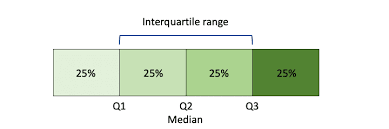

**Formula:**

\begin{equation}
  \textrm{Interquartile Range (IQR)} = Q_3 - Q_1 \tag{viii}
\end{equation}

Here, given 2n (even) or 2n+1 (odd) number of values.

* first quartile `Q1` = median of the n smallest values
* third quartile `Q3` = median of the n largest values
* second quartile `Q2` = same as the median

In [ ]:
def find_iqr(_data, _data_numpy, ax, n):

  try:

    n = int(n)
    ax = int(ax)

    if n is 0:

      _data_numpy = np.sort(_data_numpy)
      print("Shape of selected numpy array: ", _data_numpy.shape)

      start = time.time()

      if not _data_numpy.any():
        return None
        
      q3 = find_percentile(_data_numpy, 75, ax, n)
      q1 = find_percentile(_data_numpy, 25, ax, n)
      
      iqr = q3 - q1
      print("Time taken to calculate: ", time.time() - start)
      
      return iqr

    if n is 1:

      start = time.time()
      iqr = _data.quantile(axis=ax)
      print("Time taken to calculate: ", time.time() - start)

      return iqr

    if n is not 0 or n is not 1:
      print("Enter correct value")
  
  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error


In [ ]:
n = input("Enter 0 (To find iqr without any library function & in numpy array), Enter 1 (Via using Library Function & in dataframe): ")
print("Data Type of taken input: ", type(n))

_digit = input("Enter the digit whose percentile of pixel values you want to find: ")
print("Data Type of digit: ", type(_digit))

ax = input("Enter 0 (To find along row), 1 (To find along column): ")

_data, _data_numpy, _data_label, _data_label_numpy = select_digit(train_all, train_label, df_train, _digit)

iqr = find_iqr(_data, _data_numpy, ax, n)
print("IQR of sample: ", iqr)

Enter 0 (To find iqr without any library function & in numpy array), Enter 1 (Via using Library Function & in dataframe): 0
Data Type of taken input:  <class 'str'>
Enter the digit whose percentile of pixel values you want to find: 5
Data Type of digit:  <class 'str'>
Enter 0 (To find along row), 1 (To find along column): 0
Shape of selected numpy array:  (3795, 784)
Shape of selected numpy array:  (3795, 784)
Time taken to calculate:  0.0038003921508789062
Shape of selected numpy array:  (3795, 784)
Time taken to calculate:  0.0038268566131591797
Time taken to calculate:  0.15634799003601074
IQR of sample:  [   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.

### <font face = "Times New Roman"> <b> Exploring Binary and Categorical Data </b> </font>

#### <font face = "Times New Roman"> <b> Mode </b> </font>

* `Mode` is the value that appear most offten in dataset.
* It is a summay statistic for **categorical data** i.e. grouped data or set of values representing a possible categories.
* It is not used for **numeric data** i.e. data expressed in number scale.

In [ ]:
def find_mode(counts, n):

  try:

    n = int(n)

    print("Shape of selected numpy array: ", counts.shape)
    print("Data type of _data_numpy: ", type(counts))

    if n is 0:

      start = time.time()
      max = counts[0]
      num = 0
      for row in counts:
        num +=1
        if row > max:
          mode = num-1
          max = row

      list = [mode, max]

      print("Time taken to calculate: ", time.time() - start)
      return list

    if n is 1:
   
      start = time.time()
      mode = counts.mode(dropna=True)
      print("Time taken to calculate: ", time.time() - start)
      return mode

    if n is not 0 or n is not 1:
      print("Enter correct value")
  
  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error

In [ ]:
n = input("Enter 0 (To find mode without any library function), Enter 1 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

mode = find_mode(counts, n)
print("Mode of sample: ", mode)

Enter 0 (To find mode without any library function), Enter 1 (Via using Library Function): 1
Data Type of taken input:  <class 'str'>
Shape of selected numpy array:  (10,)
Data type of _data_numpy:  <class 'pandas.core.series.Series'>
Time taken to calculate:  0.0006105899810791016
Mode of sample:  0    3795
1    4063
2    4072
3    4132
4    4137
5    4177
6    4188
7    4351
8    4401
9    4684
dtype: int64


In [ ]:
def plot_boxplot(counts):

  try:

    start = time.time()
    plt.boxplot(counts)
    print("Time taken to plot: ", time.time() - start)

  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error

Time taken to plot:  0.033325910568237305


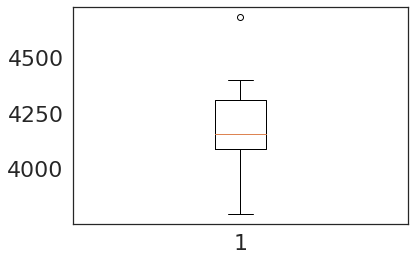

In [ ]:
plot_boxplot(counts)

#### <font face = "Times New Roman"> <b> Probability </b> </font>

* `Probability` of an event will happen is how likly the event occurs again and again if tested again and again.
* **Formula:**

$P(A) = \frac{Number\ of\ Favourable\ Outcomes}{Total\ Number\ of\ Favourable\ Outcomes}$

In [ ]:
def find_prob(counts):

  try:

    print("Shape of selected numpy array: ", counts.shape)
    print("Data type of _data_numpy: ", type(counts))

    start = time.time()
    sum = 0
    for row in counts:
      sum += row
    probability = []
    for row in counts:
      p = row/sum
      probability.append(p)
    print("Time taken to calculate: ", time.time() - start)
    return probability
  
  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error

In [ ]:
prob = find_prob(counts)
print("Probability of each digit: ", prob)

Shape of selected numpy array:  (10,)
Data type of _data_numpy:  <class 'pandas.core.series.Series'>
Time taken to calculate:  6.747245788574219e-05
Probability of each digit:  [0.09838095238095237, 0.11152380952380953, 0.09945238095238096, 0.1035952380952381, 0.09695238095238096, 0.09035714285714286, 0.0985, 0.10478571428571429, 0.09673809523809523, 0.09971428571428571]


In [ ]:
print(prob[0])

0.09838095238095237


#### <font face = "Times New Roman"> <b> Expected Value </b> </font>

* `Expected Value` is calculated by:

   i) Multiply each outcome by its probability of occurrence.

   ii) Sum these values.
* It is a form of `weighted mean`.
* This concept is basically used for **categorical data**.
* **Formula:**



$E[X] = \Sigma_{i}x_if(x_i)$

$E[X] = \int_{-\infty}^{\infty}xf(x)dx$



Here, $x_1$, $x_2$, ......, $x_i$ are data and f($x_i$) are the probability of outcomes and E[X]: Represents Expected Value

In [ ]:
def find_ev(counts, prob):

  try:

    print("Shape of selected numpy array: ", counts.shape)
    print("Data type of _data_numpy: ", type(counts))

    start = time.time()

    ev = []
    num = 0
    for row in counts:
      val = row * prob[num]
      num += 1
      ev.append(val)

    total_ev = 0
    for row in ev:
      total_ev += row
    
    print("Time taken to calculate: ", time.time() - start)
    return ev, total_ev

  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error

In [ ]:
ev, total_ev = find_ev(counts, prob)
print("Expected Value of each digit: ", ev)
print("Total Expected value: ", total_ev)

Shape of selected numpy array:  (10,)
Data type of _data_numpy:  <class 'pandas.core.series.Series'>
Time taken to calculate:  0.00010395050048828125
Expected Value of each digit:  [406.51009523809523, 522.3775238095238, 415.41259523809526, 450.742880952381, 394.79009523809526, 342.90535714285716, 407.4945, 461.1619285714286, 393.04688095238095, 417.6034285714286]
Total Expected value:  4212.045285714286


### <font face = "Times New Roman"> <b> Correlation </b> </font>

#### <font face = "Times New Roman"> <b> Definition </b> </font>


`Correlation` is the measure which is used to know how similar the two variables are.


#### <font face = "Times New Roman"> <b> Correlation Coefficient </b> </font>

* It is used to measure the strength of correlation between two variables.
* **Range:** 1 to -1
* Values above 1 or less than -1 are concluded as error in calculation.
* `Negative Correlation` indicates that if one variable increases the other decreases or vice versa.
* `Positive Correlation` indicates that both are similar i.e. if one increases the other one also increases and vice versa.
* `0` correlation means that the samples shows no relation between each other.



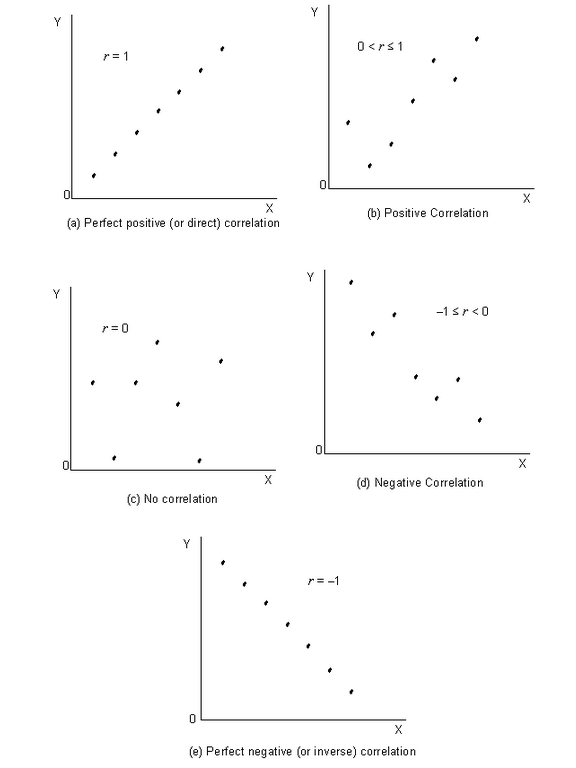

#### <font face = "Times New Roman"> <b> Correlation Matrix </b> </font>


A table where variables are shown as rows and columns and the cell values are the correlations between the variables is known as `Correlation Matrix`.



In [ ]:
def corr_matrix(train_all):
  try:
    start = time.time()
    corr = train_all.corr() 
    print("Time taken to calculate: ", time.time() - start)
    return corr

  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error


In [ ]:
corr = corr_matrix(train_all)
print(corr)

Time taken to calculate:  53.437039613723755
          pixel0  pixel1  pixel2  ...  pixel781  pixel782  pixel783
pixel0       NaN     NaN     NaN  ...       NaN       NaN       NaN
pixel1       NaN     NaN     NaN  ...       NaN       NaN       NaN
pixel2       NaN     NaN     NaN  ...       NaN       NaN       NaN
pixel3       NaN     NaN     NaN  ...       NaN       NaN       NaN
pixel4       NaN     NaN     NaN  ...       NaN       NaN       NaN
...          ...     ...     ...  ...       ...       ...       ...
pixel779     NaN     NaN     NaN  ...       NaN       NaN       NaN
pixel780     NaN     NaN     NaN  ...       NaN       NaN       NaN
pixel781     NaN     NaN     NaN  ...       NaN       NaN       NaN
pixel782     NaN     NaN     NaN  ...       NaN       NaN       NaN
pixel783     NaN     NaN     NaN  ...       NaN       NaN       NaN

[784 rows x 784 columns]


In [ ]:
def corr_plot(corr, cmap_ar):
  try:
    start = time.time()
    plt.figure(figsize=(16, 16))
    sns.heatmap(corr, vmin=-1, vmax=1, cmap=cmap_ar) 
    sns.set(font_scale=2,style='white')
    plt.tight_layout()
    
    plt.title('Heatmap correlation')
    plt.show()
    print("Time taken to plot: ", time.time() - start)

  except AttributeError as error:
    print("Attribute Error Occured.")
    print("The error is ", error)
    
  except ValueError as error:
    print("Value Error Occured.")
    print("The error is ", error)

Enter the cmap style from the above arrguments: 4
Color plotted:  Accent


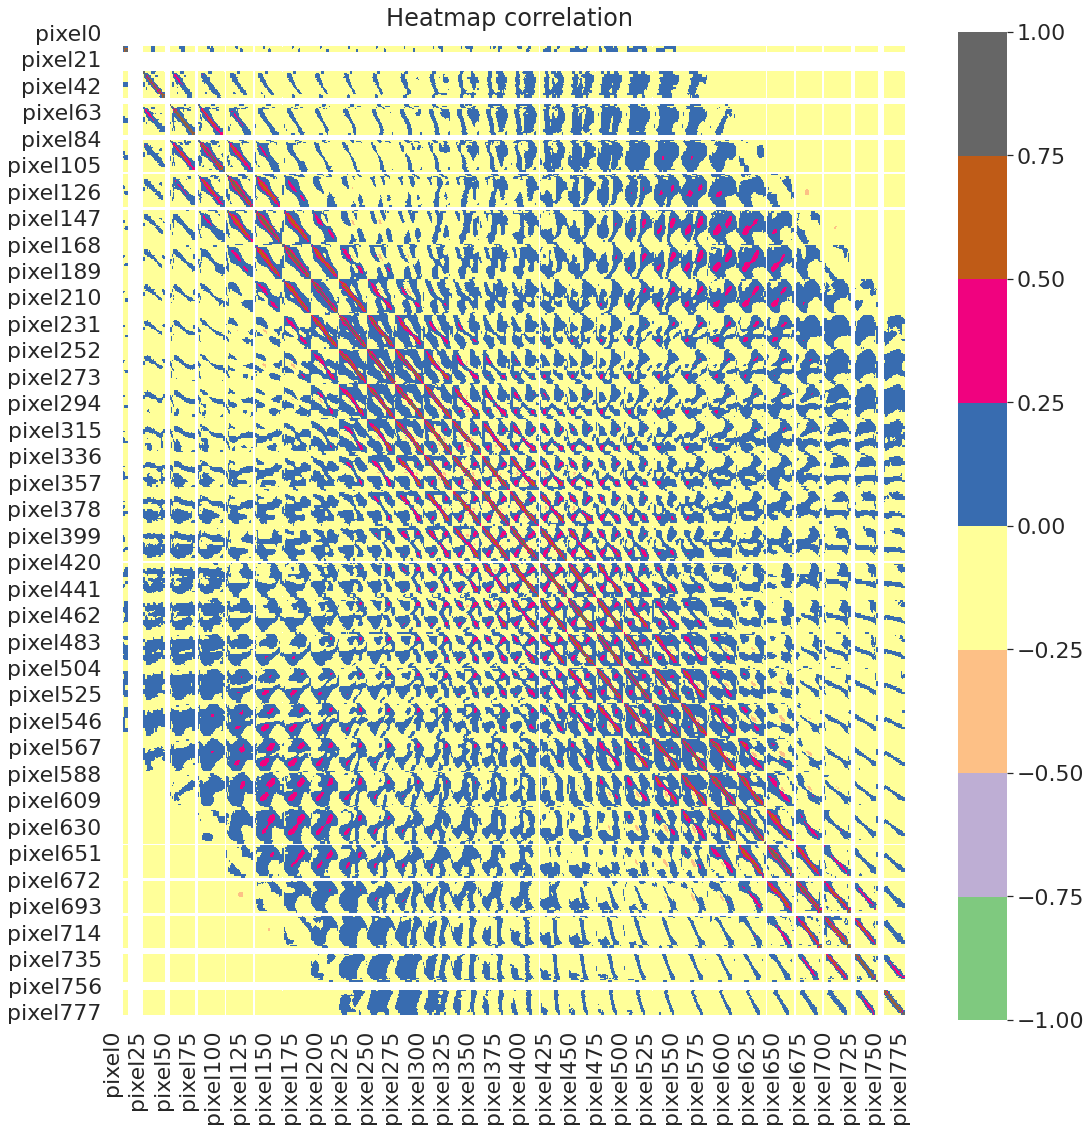

Time taken to plot:  2.0296943187713623


In [ ]:
val = ['coolwarm', sns.diverging_palette(20, 220, as_cmap=True), 'Blues', 'YlGnBu', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

n = input("Enter the cmap style from the above arrguments: ")
n = int(n)
cmap_ar = val[n]
print("Color plotted: ", val[n])

corr_plot(corr, cmap_ar)

#### <font face = "Times New Roman"> <b> Pearson’s Correlation Coefficient </b> </font>

Steps to calculate:

* Calculate covariance of the given two varaibles.
* Calculate standard deviation of both variables.
* Put in formula.

**Formula:**

\begin{equation}
    r = \frac{\sum^n_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{(n-1)s_xs_y} \tag{xi}
\end{equation}


### <font face = "Times New Roman"> <b> T-Test </b> </font>

#### <font face = "Times New Roman"> <b> Definition </b> </font>

* The `T-test` i.e. `Student’s T Test` compares two **means** and tells us if they are different from each other.
* It tells whether two samples have been drawn from same sample or not.
* It tell's how significant our result is, more specifically it tells whether it happened by chance or not.

#### <font face = "Times New Roman"> <b> T-Values and Degrees of Freedom </b></font>

* `T-Value` is the ratio of the difference between the mean of the two sample sets and the variation that exists within the sample sets.
* T-Value is also called `T-Score`.
* Large t-score indicates that the groups are different.
* Small t-score indicates that the groups are similar.
* `Degree Of Freedom` are the values that has a freedom to vary.
* **Formula of Degree of Freedom:** df = n<sub>x</sub> + n<sub>y</sub> - 2

#### <font face = "Times New Roman"> <b> Normal Distribution </b></font>

* It has a `bell-shaped` density curve.
* The density curve is symmetrical and centered about `mean(μ)`. It determines the **peak** of the curve.
* Data spread it determined by `standard deviation(sigma-σ)` i.e. it is a measure of **variability**. It determines how far the data falls from the mean.

The density curve is as follows: 

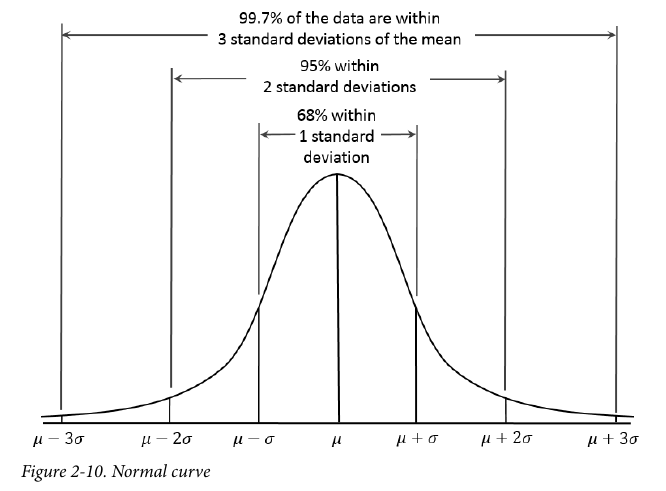

#### <font face = "Times New Roman"> <b> Standardization (Normalization, z-Scores) </b></font>

* The process of putting different variables to a same scale is known as `Standardization`. 
* Also called `Normalization`.
* It allows us to compare scores between different types of variables.
* **Formula:**

<table><th align = "left"> $z = \frac{x - \mu}{\sigma}$ <th align = "right"> ; Where $\mu = $ mean and $\sigma = $ Standard deviation </th></table>


* Result of this formula is known as `z-score`.
* `z-score` tells the overall data lies compared to overall population.

> <font color='green'><b> Note:</b></font> The higher (or lower) the Z-score, the more unlikely the result is to happen by chance and the more likely the result is meaningful.<sup>[1]</sup>

#### <font face = "Times New Roman"> <b> p-Value and alpha </b><font>

##### **Significance Level-Alpha**

* It is a probability of rejecting the null hypothesis when it is true.

* Drawing a two tailed graph for alpha = 0.05 and alpha = 0.01:<sup>[1]</sup>

**Some Keypoints:**
* We need to shade 5% or 1% of graph that is furthest from null hypothesis(since we are rejecting).
* The sample mean for the given distribution is 330.6.

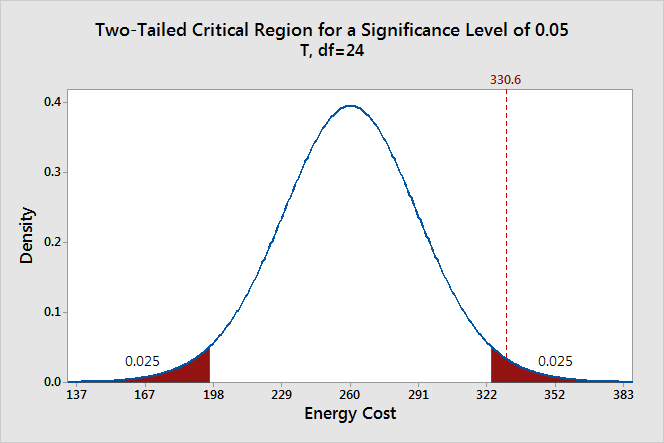

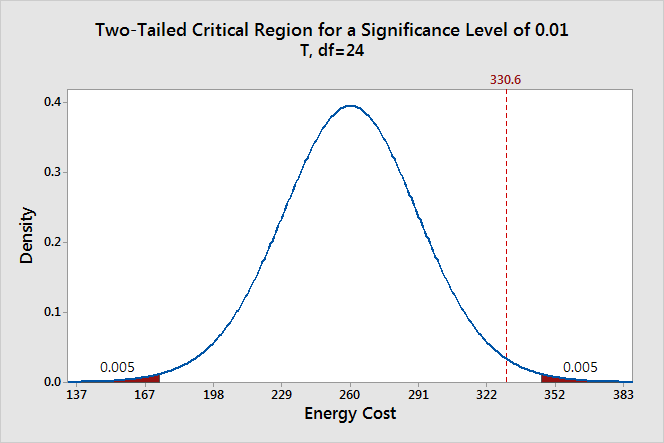

**Observation:**

* For the above two-tailed test, the critical region (the shaded part) lies equidistant from the null hypothesis value.
* Sample mean 330.6 is significant in case for 5% significance but not for the case of 1% significance level.

**Conclusion**

* We'll reject null hypothesis for 5% significance level.
* Fail to reject null hypothesis for 1% significance level.

##### **P-Value**

* The probability that the results from our sample data occurred by chance is known as `p-value`.
* Lower p-values are good because they indicate that the data does not occur by chance.
* *Example:* p-value = 0.01 indicates that their is only 1% probability that the data occured by chance.
* If the observed p-value is less than alpha, then the results are statistically significant.

#### <font face = "Times New Roman"> <b> Type's Of T-Test </b></font>

##### **Student's T-Test**

* Sample's are Independent.
* Sample's are drawn from Gaussian Distribution.
* Size of each sample must be same.
* Sample's have same variance.
* Sample's have different mean.
* Values of one sample does not have any effect to values of other sample.

**Formula:**

<table><th align = "left">$t =\frac{M_x - M_y}{\sqrt{\frac{S^2_x}{n_x}+\frac{S^2_y}{n_y}}}\ $
<th align = 'right'> ; Where $M = $ mean and $n = $ number of scope per group</th></table>

<table><th align = "left">$S^2 = \frac{\Sigma{(x-M)^2}}{n-1}$ <th align = "right"> ; Where $x = $ Individual scores, $M = $ mean and $n = $ number of scores in group</th></table>

##### **Paired Student's T-Test**

* Sample's are Dependent.
* They may be from same population.
* Used to check whether the difference of means of two samples are zero or not.
* They have unequal variance.
* Similar to Student's T-Test they are also drawn from Gaussian Distribution.
* Values of one sample effect the values of other sample.

**Formula:**

$t = \frac{\frac{\Sigma D}{N}}{\sqrt{\frac{\Sigma D^2 - (\frac{(\Sigma D)^2}{N})}{(N - 1)(N)}}}$

#### <font face = "Times New Roman"> <b> Hypothesis </b></font>

* Hypothesis testing is used to assess the probability of a hypothesis by using sample data.
* An assumption is made looking into population and test are preformed according to it.

##### **Null Hypothesis**

* It stats/assumnes that their is no difference between population characteristics (mean, propotion).
* It is denoted by H<sub>0</sub>.

##### **Alternative Hypothesis**

* It claims that the population is contradictory to null hypothesis. Hence, reject null hypothesis.
* It is denoted by H<sub>1</sub>.

#### <font face = "Times New Roman"> <b> Procedure </b></font>

* Determine a null and alternate hypothesis.
* Collect sample data.
* Determine a confidence interval and degrees of freedom.
* Calculate the t-statistic.
* Calculate the critical t-value from the t distribution.
* Compare the critical t-values with the calculated t statistic.

#### <font face = "Times New Roman"> <b> Creating Samples </b></font>

In [ ]:
_digit = input("Enter digit who needs to be tested: ")

_data, _data_numpy, _data_label, _data_label_numpy = select_digit(train_all, train_label, df_train, _digit)

sample_1 = _data_numpy.copy()

sample_1

Enter digit who needs to be tested: 5


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
sample_1.shape

(3795, 784)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Time taken to plot:  17.63542342185974


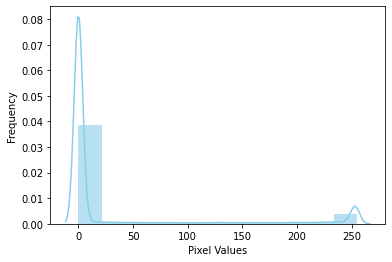

In [ ]:
intensity_plot(sample_1)

In [ ]:

_digit = input("Enter digit who needs to be tested: ")

_data, _data_numpy, _data_label, _data_label_numpy = select_digit(train_all, train_label, df_train, _digit)

sample_2 = _data_numpy.copy()

sample_2

Enter digit who needs to be tested: 7


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
sample_2.shape

(4401, 784)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Time taken to plot:  20.241396188735962


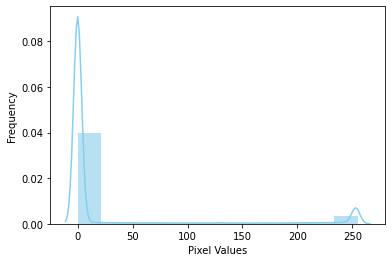

In [ ]:
intensity_plot(sample_2)

#### <font face = "Times New Roman"> <b> T-Test Implementation </b></font>

<h5> <font face = "Times New Roman"> <b> Creating some user defined function for Dependent Samples </b></font></h5>

In [ ]:
"""
    To find sum squared difference and sum difference between observations.

"""

def find_diff(sample1, sample2):
  sq_diff = sum([(sample1[i] - sample2[i]) ** 2 for i in range(len(sample1))])
  diff = sum([sample1[i] - sample2[i] for i in range(len(sample1))])
  return sq_diff, diff

In [ ]:
"""
    To find standard deviation.

"""

def find_dev(sq_diff, diff, size):
  std = np.sqrt((sq_diff - (diff ** 2 / size)) / (size - 1))
  return std

In [ ]:
"""
    To calculate t-statistic.

"""

def dep_ttest(sample1, sample2, n, size):

  sample1_mean = find_mean(sample1, n)
  sample2_mean = find_mean(sample2, n)

  print("Mean of Sample1:", sample1_mean)
  print("Mean of Sample2:", sample2_mean)

  sq_diff, diff = find_diff(sample1, sample2)
  std_dev = find_dev(sq_diff, diff, size)
  std_error = std_dev / np.sqrt(size)

  t_stat = (sample1_mean - sample2_mean) / std_error

  return t_stat

In [ ]:
"""
    To calculate p-value, compare with critical t-value

"""

def dep_pval(sample1, sample2, size, t_statistic):
  # Degree of freedom.
  df = size - 1
  # p-value after comparision with the t-stat
  p = 1 - sci.stats.t.cdf(t_statistic, df = df)
  pval = 2 * p
  return pval

<h5> <font face = "Times New Roman"> <b> Creating some user defined function for Independent Samples </b></font></h5>

In [ ]:
"""
    To calculate t-statistic for independent samples.
"""

def ind_ttest(sample1, sample2, n, size1, size2):

  var_1, std_1 = find_var_std(sample1, n)
  var_2, std_2 = find_var_std(sample2, n)

  print("Variance of sample1:", var_1)
  print("Variance of sample2:", var_2)
  print("Standard Deviation of sample1: ", std_1)
  print("Standard Deviation of sample2: ", std_2)

  sample1_mean = find_mean(sample1, n)
  sample2_mean = find_mean(sample2, n)

  t_stat = (sample1_mean - sample2_mean)/(np.sqrt(np.sum(np.power(std_1, 2)/size1), np.power(std_2, 2)/size2))

  return t_stat

In [ ]:
"""
    To calculate p-value, compare with critical t-value
"""

def ind_pval(sample1, sample2, t_statistic, size1, size2):
  # Degree of freedom.
  df = size1 + size2 - 2
  # p-value after comparision with the t-stat
  p = 1 - sci.stats.t.cdf(t_statistic, df = df)
  pval = 2 * p
  return pval

<h5> <font face = "Times New Roman"> <b> Function for T-Test </b></font></h5>

In [ ]:
def t_test(sample_1, sample_2, alpha, n, sample_type, size1, size2):

  try:

    n = int(n)
    alpha = float(alpha)

    if n is 1:

      if sample_type is 0:

        start = time.time()

        statistic, pvalue = sci.stats.ttest_rel(sample1, sample2)

        print("Statistics: ", statistic)
        print("P-Value: ", pvalue)
        print("Same Distributions- fails to Reject H0") if pvalue.any() > alpha else print("Different Distributions- Reject H0")

        print("Time taken to formulate: ", time.time() - start)

      if sample_type is 1:

        start = time.time()

        statistic, pvalue = sci.stats.ttest_ind(sample1, sample2)

        print("Statistics: ", statistic)
        print("P-Value: ", pvalue)
        print("Same Distributions- fails to Reject H0") if pvalue.any() > alpha else print("Different Distributions- Reject H0")

        print("Time taken to formulate: ", time.time() - start)

      if sample_type is not 0 or sample_type is not 1:
        print("Enter correct sample type")

    elif n is 0:

      if sample_type is 0:

        start = time.time()
        
        mean = find_mean(sample_1, n)
        t_stat = dep_ttest(sample_1, sample_2, n, size1)
        pvalue = dep_pval(sample_1, sample_2, size1, t_stat)

        print("Statistics: ", t_stat)
        print("P-Value: ", pvalue)
        print("Same Distributions- fails to Reject H0") if pvalue.any() > alpha else print("Different Distributions- Reject H0")
        
        print("Time taken to formulate: ", time.time() - start)

      if sample_type is 1:

        start = time.time()

        t_statistic = ind_ttest(sample_1, sample_2, n, size1, size2)
        pvalue = ind_pval(sample_1, sample_2, t_statistic, size1, size2)

        print("Same Distributions- fails to Reject H0") if pvalue.any() > alpha else print("Different Distributions- Reject H0")

        print("Time taken to formulate: ", time.time() - start)


    elif n is not 0 or n is not 1:
      print("Enter correct value")

  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error


In [ ]:
n = input("Enter 0 (To calculate without library functions), 1 (Via Library function): ")
alpha = input("Enter alpha value: ")

size_sample_1 = sample_1.shape[0] * sample_1.shape[1]
size_sample_2 = sample_2.shape[0] * sample_2.shape[1]


if size_sample_1 != size_sample_2:
  sample_type = 1
else:
  sample_type = 0

t_test(sample_1, sample_2, alpha, n, sample_type, size_sample_1, size_sample_2)

Enter 0 (To calculate without library functions), 1 (Via Library function): 0
Enter alpha value: 0.03
Shape of selected numpy array:  (3795, 784)
Data type of _data_numpy:  <class 'numpy.ndarray'>
Time taken to calculate:  0.07941031455993652
Shape of selected numpy array:  (4401, 784)
Data type of _data_numpy:  <class 'numpy.ndarray'>
Time taken to calculate:  0.11310410499572754
Variance of sample1: [6481.959339858391, 9632.64381865629, 8420.83508010985, 7148.934011870055, 4154.958760672636, 9920.21847504946, 5626.020094166492, 5534.004996290609, 5730.665528360579, 6111.655506494691, 3228.474384045711, 8459.82103810912, 6241.815591159932, 6907.918933517283, 5101.896577923261, 6652.485624479383, 6711.827936276552, 3954.17984531185, 5600.465008069555, 3281.5860822964387, 6245.533877485944, 6626.108418367346, 6967.387338608914, 4955.164254477301, 6391.02160395408, 6128.16152124115, 5305.655337294355, 8374.055743375156, 4190.787946428572, 4339.472119364327, 6366.629371550916, 4722.859375

## <font face = "Times New Roman"> <b> Dimentionality Reduction Techniques </b> </font>

### <font face = "Times New Roman"> <b> What is Dimensionality Reduction? </b></font>

The process of obtaining a set of principle variables and by reducing the number of random variables is known as Dimensionality Reduction.

**Common Dimensionality Reduction Techniques**

It can be done in two ways:

1. **Feature Selection** : Keeping most relevalent data from the original dataset is known as feature selection.
2. **Feature Extraction** : This reduces higher dimentional data to lower dimentional data.

### <font face = "Times New Roman"> <b> Why is Dimensionality Reduction required? </b></font>

Importance of Dimensionality Reduction are:

1. On decreasing the number of dimensiontions of data the space required to stored data decreases.
2. Data visualization becomes eaiser. 2D or 3D data are eaiser to visulise and interpret then large dimentional like 1000D data.
3. Lesser number of dimentions leads to less computation time.
4. It may be helpful in some algorithm to perform better if they data have less dimention.
5. It takes care of multicollinearity by removing redundant features.

### <font face = "Times New Roman"> <b> Principal Component Analysis </b> </font>

To extract new set of variables from the existing set of variables in known as **Principal Component Abalysis**. The newly extracted variables is known as **Principal Components.**

**Properties**:

*   Principal componenta are the linear combination of the original variables.
*   1st PC: Explains maximum variance in dataset
*   2nd PC: Tries to explain the remaining variance in dataset and is uncorrelated to 1st PC
*   3rd PC: Explain variance which is not in the above two.

Each additional dimension we add to the PCA technique captures less and less of the variance in the model. The first component is the most important one, followed by the second, then the third, and so on.

**PCA()** : This function is used to calculate PCA.

**Parameters** : 
1. *n_components* : Number of components to keep(here 4)

Here, fitted transform(fit_transform) is calculated for the column values of df_train Dataframe. Then dimentionality reduction is calculated via PCA() function.

In [ ]:
feat_cols=train_all.columns.values
print(feat_cols)

['pixel0' 'pixel1' 'pixel2' 'pixel3' 'pixel4' 'pixel5' 'pixel6' 'pixel7'
 'pixel8' 'pixel9' 'pixel10' 'pixel11' 'pixel12' 'pixel13' 'pixel14'
 'pixel15' 'pixel16' 'pixel17' 'pixel18' 'pixel19' 'pixel20' 'pixel21'
 'pixel22' 'pixel23' 'pixel24' 'pixel25' 'pixel26' 'pixel27' 'pixel28'
 'pixel29' 'pixel30' 'pixel31' 'pixel32' 'pixel33' 'pixel34' 'pixel35'
 'pixel36' 'pixel37' 'pixel38' 'pixel39' 'pixel40' 'pixel41' 'pixel42'
 'pixel43' 'pixel44' 'pixel45' 'pixel46' 'pixel47' 'pixel48' 'pixel49'
 'pixel50' 'pixel51' 'pixel52' 'pixel53' 'pixel54' 'pixel55' 'pixel56'
 'pixel57' 'pixel58' 'pixel59' 'pixel60' 'pixel61' 'pixel62' 'pixel63'
 'pixel64' 'pixel65' 'pixel66' 'pixel67' 'pixel68' 'pixel69' 'pixel70'
 'pixel71' 'pixel72' 'pixel73' 'pixel74' 'pixel75' 'pixel76' 'pixel77'
 'pixel78' 'pixel79' 'pixel80' 'pixel81' 'pixel82' 'pixel83' 'pixel84'
 'pixel85' 'pixel86' 'pixel87' 'pixel88' 'pixel89' 'pixel90' 'pixel91'
 'pixel92' 'pixel93' 'pixel94' 'pixel95' 'pixel96' 'pixel97' 'pixel98'
 'pixe

In [ ]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(train_all[feat_cols].values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

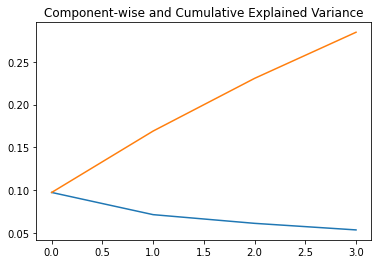

In [ ]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

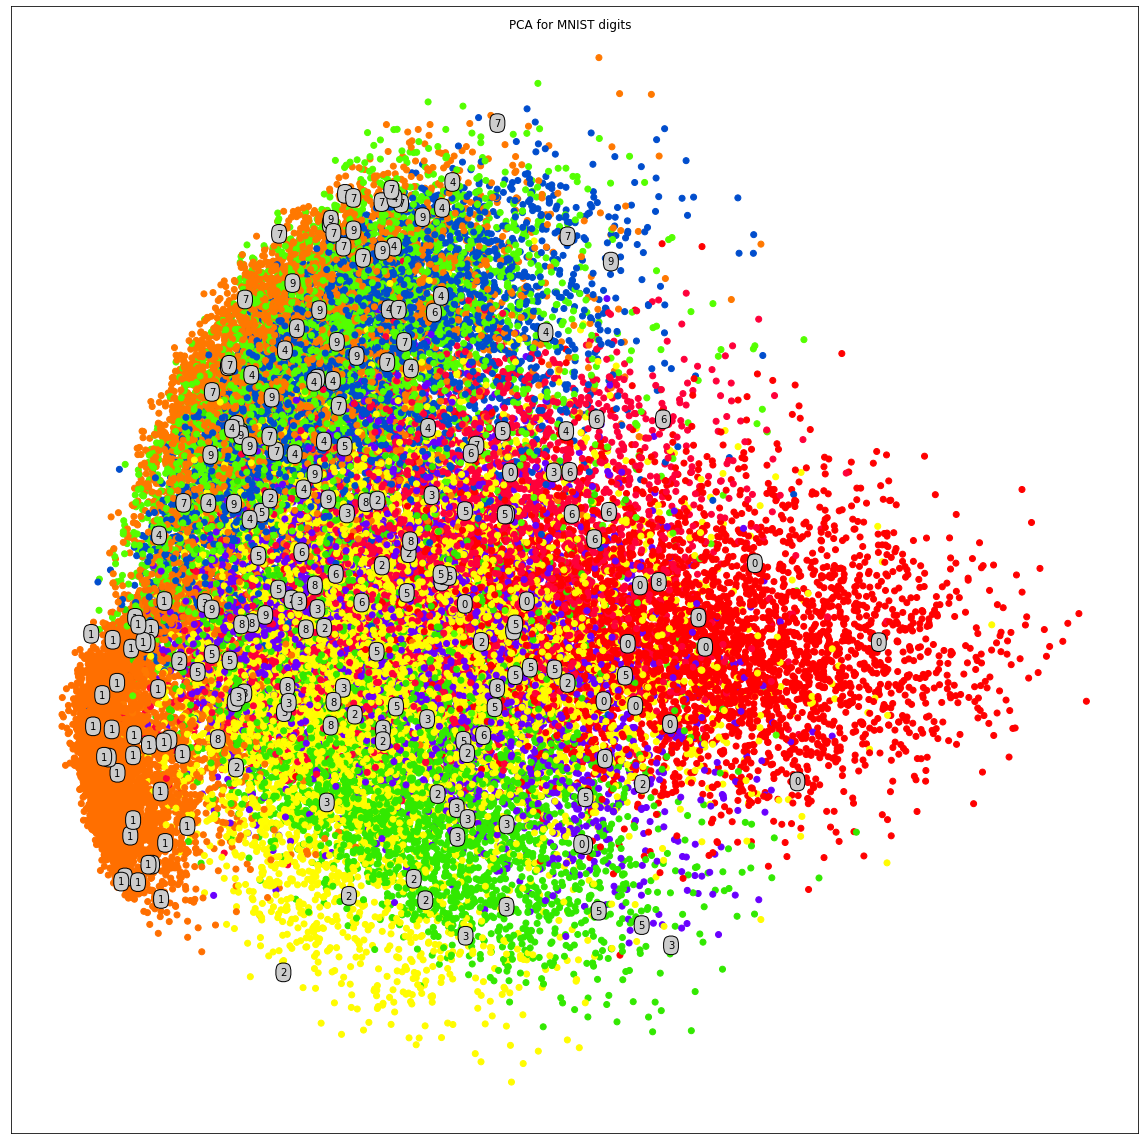

In [ ]:
pca = PCA(n_components=3)
fig, plot = plt.subplots()
fig.set_size_inches(16, 16)
plt.prism()

X_transformed = pca.fit_transform(train_all)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=train_label)
plot.set_xticks(())
plot.set_yticks(())

count=0;
plt.tight_layout()
plt.suptitle("PCA for MNIST digits ")
for label , x, y in zip(train_label, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle="round4,pad=.5", fc="0.8"))
  count = count + 1
#plt.savefig("mnist_pca.png")
plt.show()


### <font face = "Times New Roman"> <b> Singular Value Decomposition </b> </font>

**Definition** : 

 Any rectangular matrix $A$ can be decomposed into three matrices of particular shapes and characteristics:

 \begin{align}A = U \Sigma V^T\end{align}

Here, 
* $U$ and $V$ are orthogonal matrices i.e. 
 \begin{align} U^TU = V^TV = I \end{align}
* $\Sigma$ is a diagonal matrix containing the singular values of $X$, which can be positive, zero, or negative.

Here, we created Dataframe df_train where we removed column label. And printed out output.


In [ ]:
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(train_all[feat_cols].values)

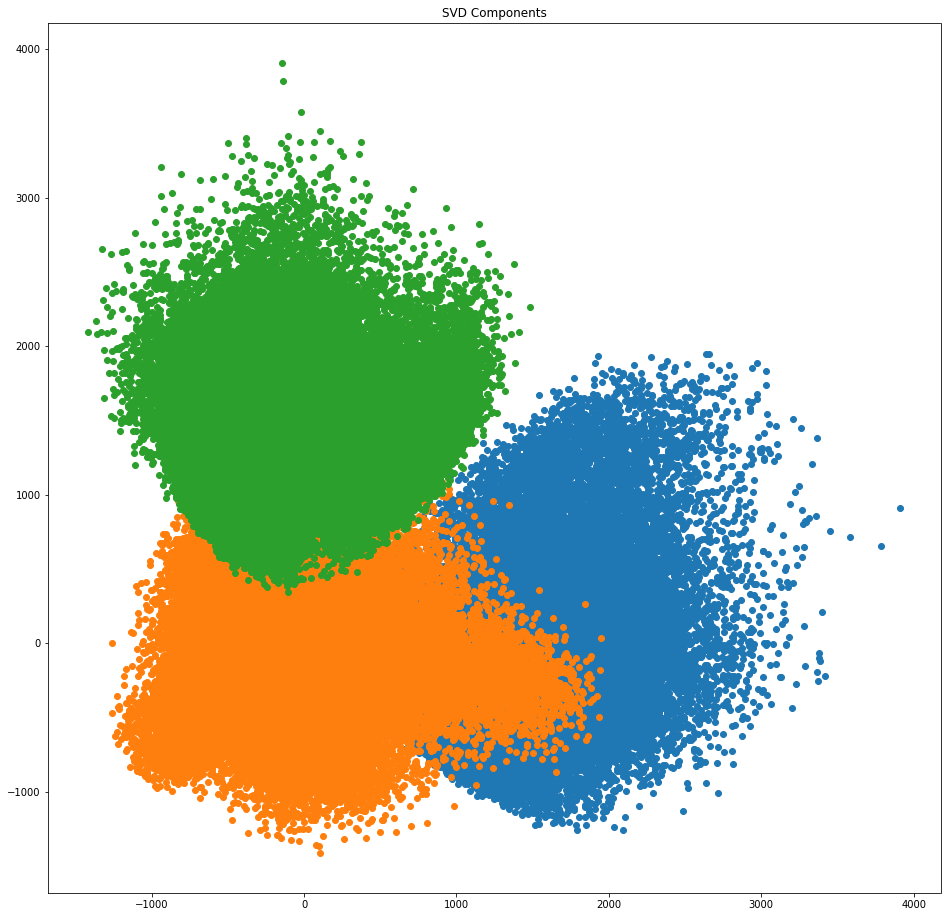

In [ ]:
plt.figure(figsize=(16, 16))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

### <font face = "Times New Roman"> <b> Linear Discriminant Analysis </b> </font>

`LDA` is a dimentionality reduction technique used for data preprocessing. LDA is used to find the axes that maximize the separation between multiple classes instead PCA is used to find the component axes that maximize the variance of our data.

Steps to perform LDA:

*   Calculate d-dimensional mean vectors for the different classes from the dataset
*   Calculate scatter matrix.
*   Calculate eigen values and corresponding eigen vectors for scatter matrix.
*   Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W
*   Use this d×k eigenvector matrix to transform the samples onto the new subspace



In this section we imported LinerDisscriminantAnalysis as LDA from sklearn.discriminant_analysis.

LDA() library is used here for dimentionality reduction. Such that the parameter n_components(number of components to be selected) is set as 2.

Then fit_transform is calculated between the column values of df_train Dataframe and train labels. 

In [ ]:
# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(train_all, train_label)

In [ ]:
def plot_scikit_lda(train_all, title):

  try:

    fig, ax = plt.subplots()
    fig.set_size_inches(16, 16)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=train_all[:,0][train_label == label],
                    y=train_all[:,1][train_label == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,)

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error


No handles with labels found to put in legend.


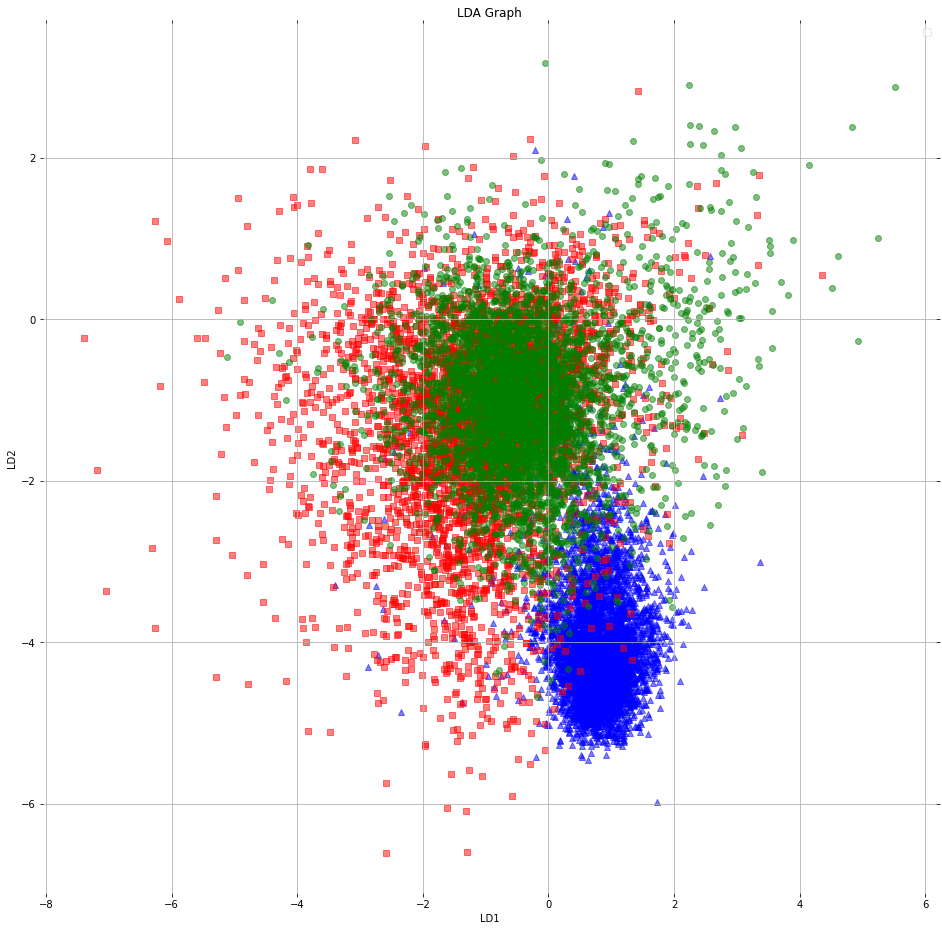

In [ ]:
plot_scikit_lda(X_lda_sklearn, title='LDA Graph')

## <font face = "Times New Roman"> <b> Classification </b> </font>

### <font face = "Times New Roman"> <b> Training Model </b> </font>

#### <font face = "Times New Roman"> <b> Model Instance </b> </font>

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=0)

#### <font face = "Times New Roman"> <b> Fitting Data In Model </b> </font>

In [ ]:
model = model.fit(train_all, train_label)


### <font face = "Times New Roman"> <b> Plotting Tree </b> </font>

#### <font face = "Times New Roman"> <b> Using plot_tree() </b> </font>

[Text(171.75605195297868, 212.71304347826086, 'X[785] <= 303.884\nentropy = 3.32\nsamples = 42000\nvalue = [4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063\n4188]'),
 Text(71.89297153024911, 203.2591304347826, 'X[784] <= -1046.794\nentropy = 3.003\nsamples = 27620\nvalue = [3821, 4682, 3875, 4200, 329, 3224, 2959, 498, 3606\n426]'),
 Text(17.404621651994756, 193.80521739130435, 'X[375] <= 0.5\nentropy = 1.254\nsamples = 5429\nvalue = [1, 4385, 86, 88, 140, 87, 79, 265, 90, 208]'),
 Text(9.067891927327215, 184.3513043478261, 'X[378] <= 159.5\nentropy = 0.731\nsamples = 4639\nvalue = [0, 4143, 79, 55, 7, 12, 16, 243, 54, 30]'),
 Text(4.9017044390335265, 174.89739130434782, 'X[207] <= 1.5\nentropy = 2.201\nsamples = 402\nvalue = [0, 115, 51, 21, 6, 4, 8, 173, 6, 18]'),
 Text(2.9194231129424986, 165.44347826086957, 'X[785] <= -130.443\nentropy = 2.29\nsamples = 219\nvalue = [0, 108, 33, 11, 5, 4, 8, 35, 6, 9]'),
 Text(1.491065742648436, 155.98956521739132, 'X[784] <= -1314.872\nentrop

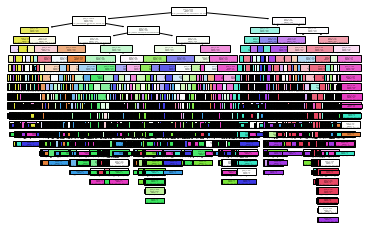

In [ ]:
tree.plot_tree(model, filled = True)

#### <font face = "Times New Roman"> <b> Using graphviz </b> </font>

In [ ]:
plot = tree.export_graphviz(model, out_file=None, filled=True)
graph = graphviz.Source(plot, format="png") 
graph

#### <font face = "Times New Roman"> <b> Using dtreeviz </b> </font>

In [ ]:
plot = dtreeviz(model, train_all, train_label)
plot
plot.save("train_decision_tree.svg")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### <font face = "Times New Roman"> <b> Model Prediction </b> </font>

In [ ]:
train_pred = model.predict(train_all)
print(train_pred)

[1 0 1 ... 7 6 9]


In [ ]:
pred = model.predict(df_test)
print(pred)

[2 0 9 ... 3 9 2]


In [ ]:
results = np.argmax(pred,axis = 0)

results = pd.Series(results,name="Label")
results

0    2
Name: Label, dtype: int64

### <font face = "Times New Roman"> <b> Model Evaluation For Training Data </b></font>

#### <font face = "Times New Roman"> <b> Confusion Matrix </b></font>

In [ ]:
cm = confusion_matrix(train_label, train_pred)
print(cm)

[[4132    0    0    0    0    0    0    0    0    0]
 [   0 4684    0    0    0    0    0    0    0    0]
 [   0    0 4177    0    0    0    0    0    0    0]
 [   0    0    0 4351    0    0    0    0    0    0]
 [   0    0    0    0 4072    0    0    0    0    0]
 [   0    0    0    0    0 3795    0    0    0    0]
 [   0    0    0    0    0    0 4137    0    0    0]
 [   0    0    0    0    0    0    0 4401    0    0]
 [   0    0    0    0    0    0    0    0 4063    0]
 [   0    0    0    0    0    0    0    0    0 4188]]


#### <font face = "Times New Roman"> <b> Accuracy </b></font>

In [ ]:
accuracy = (cm[0][0] + cm[1][1])/(np.sum(cm))
print("Train Accuracy:", accuracy)

Train Accuracy: 0.2099047619047619


#### <font face = "Times New Roman"> <b> Calculating Error </b></font>

In [ ]:
print("Mean Absolute Error:", metrics.mean_absolute_error(train_label, train_pred))
print("Mean Squared Error:", metrics.mean_squared_error(train_label, train_pred))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(train_label, train_pred)))


Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Square Error: 0.0


#### <font face = "Times New Roman"> <b> Precision, Recall, F1 Score </b></font>

In [ ]:
precision = cm[0][0]/(cm[0][0] + cm[0][1])
recall = cm[0][0]/(cm[0][0] + cm[1][0])
f_score = 2/(1/recall + 1/precision)
print("Precision:", precision)
print("Recall:", recall)
print("F-Score:", f_score)


Precision: 1.0
Recall: 1.0
F-Score: 1.0


### <font face = "Times New Roman"> <b> Model Evaluation For Testing Data </b></font>

Since the test dataset does not have lables in them so we cannot display the accuracy and the output of the classification using only decision tree as our classifier.

But we can show the visual representation of prediciton with it's lable as shown below.

In [ ]:
test_numpy = df_test.to_numpy()

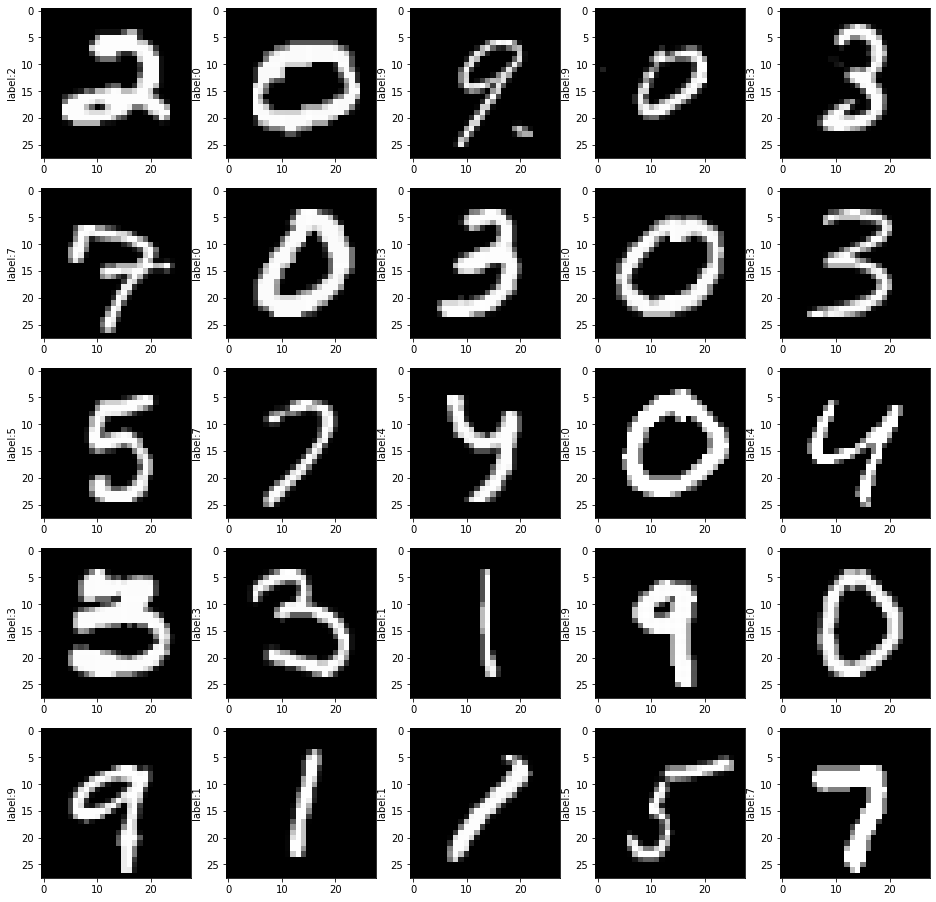

In [ ]:
plot_digit(test_numpy, pred)

As we can observe from above plot that the 4$^{th}$ value of the first row is labled as 9 but actually it's 0 so it's not all that perfect.

## <font face = "Times New Roman"> <b> Drawbacks </b> </font>

* Model Accuracy- This dataset is basically not for decision tree classification. So we got very overfitted results as all the errors equal to zero with very less accuracy.

## <font face = "Times New Roman" color = 'blue'> <b> References </b></font>


#### <font face = "Times New Roman"> <b> For Dataset </b></font>

* https://www.kaggle.com/c/digit-recognizer/data


#### <font face = "Times New Roman"> <b> Class Notes </b></font>

* SDA_1
* SDA_2
* SDA_3

#### <font face = "Times New Roman"> <b> For Plots </b></font>

* https://matplotlib.org/stable/tutorials/introductory/sample_plots.html

#### <font face = "Times New Roman"> <b> For T-Test </b></font>

* https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/
* https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/
* https://docs.scipy.org/doc/scipy/reference/stats.html
* https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

#### <font face = "Times New Roman"> <b> For Classification </b></font>

* https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/
